# Titanic Machine Learning from Disaster using an ANN

## About the dataset:
This dataset is taken from Kaggle Competition 'Titanic: Machine Learning from Disaster'.

**Setting up Google Colab.**

In [43]:
import tensorflow as tf 
device_name = tf.test.gpu_device_name() 
if device_name != '/device:GPU:0': raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [0]:
import numpy as np
np.set_printoptions(precision=4)

import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from tensorflow import keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
from sklearn.model_selection import GridSearchCV

## Importing the dataset

In [48]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Internships/Titanic/data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analyzing and modifying the train set

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [50]:
# Checking for uniformity in each column.
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [51]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [52]:
len(df_train.Age.unique())

89

In [53]:
df_train.Age.isnull().sum()

177

In [0]:
# Filling the missing values in Age with 0 in a new column.
df_train['Age_No_NA'] = df_train.Age.fillna(0)

In [55]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [56]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [57]:
len(df_train.Ticket.unique())

681

In [58]:
len(df_train.Fare.unique())

248

In [59]:
len(df_train.Cabin.unique())

148

In [60]:
df_train.Cabin.isnull().sum()

687

In [61]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
df_train.Embarked.isnull().sum()

2

In [0]:
# Dropping the rows with NA value from Embarked column.
df_train.drop(df_train[df_train.Embarked.isnull()].index, inplace=True)

In [64]:
df_train[df_train.Cabin.notnull()].Pclass.value_counts()

1    174
2     16
3     12
Name: Pclass, dtype: int64

In [65]:
df_train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Age_No_NA      889 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 97.2+ KB


## Preparing a Baseline Model

In [0]:
X = df_train.iloc[:, [2,4,6,7,9,11,12]].values

In [68]:
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0], dtype=object)

In [0]:
y = df_train.iloc[:, 1].values

In [0]:
# Label Encoding various features.
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

In [0]:
labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

In [0]:
# Creating a baseline Random Forest Classifier.
classifier = RandomForestClassifier(n_estimators=300, random_state=42, oob_score=True)

In [0]:
# Performing K-fold Cross-validation.
scores = cross_val_score(estimator=classifier, X=X, y=y, cv=5, scoring='accuracy')

In [75]:
scores

array([0.7809, 0.8034, 0.8483, 0.7697, 0.8249])

In [76]:
scores.mean()

0.8054211896146766

In [77]:
scores.std()

0.028642157769790434

In [78]:
# Fitting the model on whole dataset, for more train samples.
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [79]:
# Classifier's score on the samples which were not seen by the Random Forest algorithm.
# oob_score works as a prediction on a validation or train set.
classifier.oob_score_

0.8076490438695163

## Creating an ANN

In [97]:
X = df_train.iloc[:, [2,4,6,7,9,11,12]].values
X[0]

array([3, 'male', 1, 0, 7.25, 'S', 22.0], dtype=object)

In [0]:
y = df_train.iloc[:, 1].values

In [0]:
labelencoder_sex = LabelEncoder()
X[:, 1] = labelencoder_sex.fit_transform(X[:, 1])

labelencoder_embarked = LabelEncoder()
X[:, 5] = labelencoder_embarked.fit_transform(X[:, 5])

In [0]:
# One-Hot Encoding categorical features ie. Sex and Embarked.
ohe = OneHotEncoder(categorical_features=[1,5])
X = ohe.fit_transform(X).toarray()

In [0]:
X = X[:, [1,3,4,5,6,7,8,9]]

In [0]:
# Normalizing all the features 
norm = MinMaxScaler()
X = norm.fit_transform(X)

In [0]:
# Building the ANN Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))       

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [110]:
# Fitting the train set to the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 0s 195us/step - loss: 0.5069 - acc: 0.7862 - val_loss: 0.4150 - val_acc: 0.8371
Epoch 2/100
711/711 [==============================] - 0s 185us/step - loss: 0.4941 - acc: 0.7862 - val_loss: 0.4165 - val_acc: 0.8315
Epoch 3/100
711/711 [==============================] - 0s 189us/step - loss: 0.4877 - acc: 0.7932 - val_loss: 0.4143 - val_acc: 0.8315
Epoch 4/100
711/711 [==============================] - 0s 200us/step - loss: 0.4892 - acc: 0.7792 - val_loss: 0.4115 - val_acc: 0.8371
Epoch 5/100
711/711 [==============================] - 0s 188us/step - loss: 0.5014 - acc: 0.7876 - val_loss: 0.4120 - val_acc: 0.8315
Epoch 6/100
711/711 [==============================] - 0s 170us/step - loss: 0.4849 - acc: 0.7904 - val_loss: 0.4137 - val_acc: 0.8315
Epoch 7/100
711/711 [==============================] - 0s 192us/step - loss: 0.5085 - acc: 0.7989 - val_loss: 0.4142 - val_acc: 0.8371
Epoch 8/1

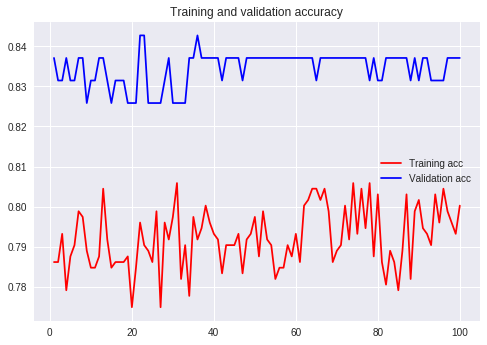

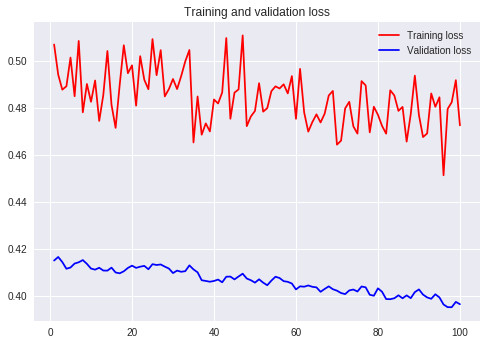

In [113]:
# Plotting training and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Improving the performance of the ANN model

In [0]:
# Making modifications to the model. Adding a new layer
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total para

In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [121]:
# Fitting the train set to the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 1s 874us/step - loss: 0.7348 - acc: 0.4754 - val_loss: 0.6813 - val_acc: 0.6461
Epoch 2/100
711/711 [==============================] - 0s 201us/step - loss: 0.6948 - acc: 0.5331 - val_loss: 0.6628 - val_acc: 0.6124
Epoch 3/100
711/711 [==============================] - 0s 185us/step - loss: 0.6890 - acc: 0.5570 - val_loss: 0.6516 - val_acc: 0.6461
Epoch 4/100
711/711 [==============================] - 0s 185us/step - loss: 0.6854 - acc: 0.5612 - val_loss: 0.6435 - val_acc: 0.6461
Epoch 5/100
711/711 [==============================] - 0s 187us/step - loss: 0.6784 - acc: 0.5767 - val_loss: 0.6399 - val_acc: 0.6461
Epoch 6/100
711/711 [==============================] - 0s 190us/step - loss: 0.6712 - acc: 0.5907 - val_loss: 0.6366 - val_acc: 0.6461
Epoch 7/100
711/711 [==============================] - 0s 187us/step - loss: 0.6648 - acc: 0.5837 - val_loss: 0.6347 - val_acc: 0.6461
Epoch 8/1

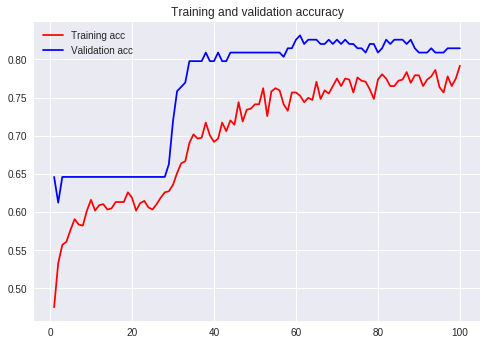

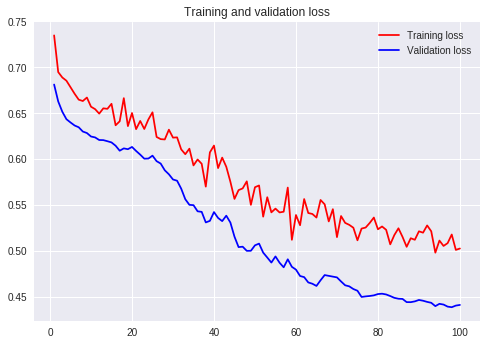

In [122]:
# Plotting training and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Again making modifications to the model. Changing the number of hidden units and removing the 
# additional layer.
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [126]:
# Fitting the train set to the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 1s 896us/step - loss: 0.6654 - acc: 0.5781 - val_loss: 0.6043 - val_acc: 0.6461
Epoch 2/100
711/711 [==============================] - 0s 197us/step - loss: 0.6462 - acc: 0.5907 - val_loss: 0.5812 - val_acc: 0.6461
Epoch 3/100
711/711 [==============================] - 0s 188us/step - loss: 0.6189 - acc: 0.6371 - val_loss: 0.5701 - val_acc: 0.6461
Epoch 4/100
711/711 [==============================] - 0s 170us/step - loss: 0.6157 - acc: 0.6540 - val_loss: 0.5558 - val_acc: 0.6742
Epoch 5/100
711/711 [==============================] - 0s 224us/step - loss: 0.6068 - acc: 0.6582 - val_loss: 0.5464 - val_acc: 0.7584
Epoch 6/100
711/711 [==============================] - 0s 188us/step - loss: 0.5901 - acc: 0.7004 - val_loss: 0.5359 - val_acc: 0.7584
Epoch 7/100
711/711 [==============================] - 0s 184us/step - loss: 0.5854 - acc: 0.7131 - val_loss: 0.5222 - val_acc: 0.8090
Epoch 8/1

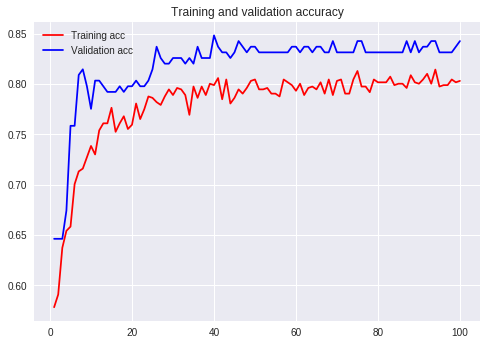

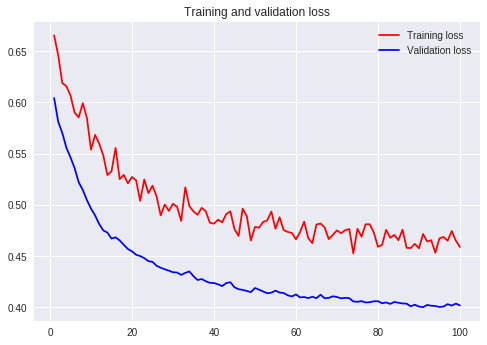

In [127]:
# Plotting training and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Adding an additional layer to the previous model.
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total para

In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [131]:
# Fitting the train set to the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 1s 1ms/step - loss: 0.6857 - acc: 0.5387 - val_loss: 0.6607 - val_acc: 0.6517
Epoch 2/100
711/711 [==============================] - 0s 206us/step - loss: 0.6617 - acc: 0.5949 - val_loss: 0.6348 - val_acc: 0.6461
Epoch 3/100
711/711 [==============================] - 0s 187us/step - loss: 0.6636 - acc: 0.5977 - val_loss: 0.6207 - val_acc: 0.6461
Epoch 4/100
711/711 [==============================] - 0s 194us/step - loss: 0.6523 - acc: 0.6090 - val_loss: 0.6121 - val_acc: 0.6461
Epoch 5/100
711/711 [==============================] - 0s 182us/step - loss: 0.6307 - acc: 0.6498 - val_loss: 0.5929 - val_acc: 0.6573
Epoch 6/100
711/711 [==============================] - 0s 184us/step - loss: 0.6294 - acc: 0.6414 - val_loss: 0.5711 - val_acc: 0.7472
Epoch 7/100
711/711 [==============================] - 0s 192us/step - loss: 0.6199 - acc: 0.6414 - val_loss: 0.5571 - val_acc: 0.7978
Epoch 8/100

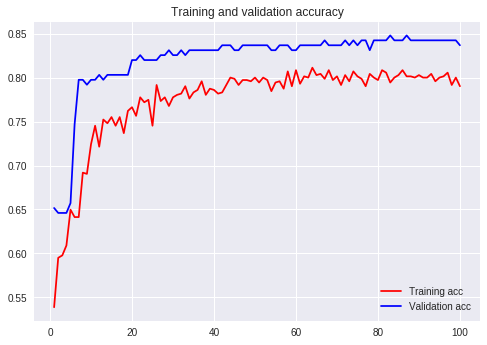

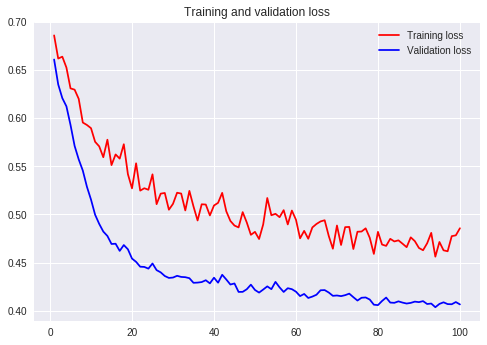

In [132]:
# Plotting training and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Again making modifications to the model. Changing the number of hidden units and removing the 
# additional layer.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [177]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [179]:
# Fitting the train set to the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 1s 1ms/step - loss: 0.6621 - acc: 0.5837 - val_loss: 0.6098 - val_acc: 0.6461
Epoch 2/100
711/711 [==============================] - 0s 201us/step - loss: 0.6355 - acc: 0.6076 - val_loss: 0.5771 - val_acc: 0.6461
Epoch 3/100
711/711 [==============================] - 0s 187us/step - loss: 0.6056 - acc: 0.6470 - val_loss: 0.5536 - val_acc: 0.6629
Epoch 4/100
711/711 [==============================] - 0s 196us/step - loss: 0.5815 - acc: 0.6723 - val_loss: 0.5297 - val_acc: 0.7697
Epoch 5/100
711/711 [==============================] - 0s 187us/step - loss: 0.5798 - acc: 0.7257 - val_loss: 0.5130 - val_acc: 0.8258
Epoch 6/100
711/711 [==============================] - 0s 213us/step - loss: 0.5572 - acc: 0.7665 - val_loss: 0.4939 - val_acc: 0.8202
Epoch 7/100
711/711 [==============================] - 0s 190us/step - loss: 0.5434 - acc: 0.7679 - val_loss: 0.4798 - val_acc: 0.8202
Epoch 8/100

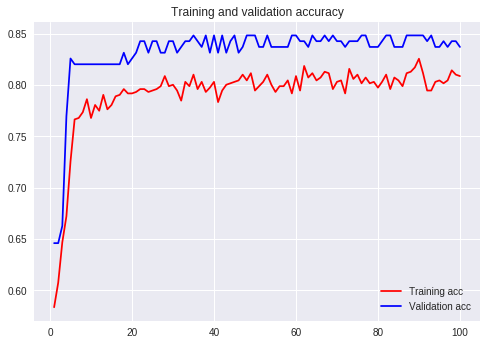

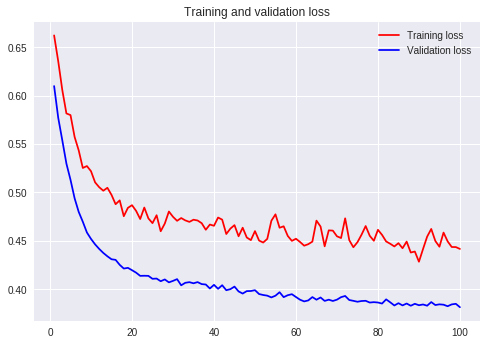

In [180]:
# Plotting training and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Adding another layer to previous model.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [206]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total para

In [0]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [208]:
# Fitting the train set to the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 1s 2ms/step - loss: 0.6780 - acc: 0.5682 - val_loss: 0.6249 - val_acc: 0.6461
Epoch 2/100
711/711 [==============================] - 0s 190us/step - loss: 0.6366 - acc: 0.6076 - val_loss: 0.5883 - val_acc: 0.6461
Epoch 3/100
711/711 [==============================] - 0s 189us/step - loss: 0.6072 - acc: 0.6315 - val_loss: 0.5604 - val_acc: 0.6685
Epoch 4/100
711/711 [==============================] - 0s 234us/step - loss: 0.6052 - acc: 0.6723 - val_loss: 0.5438 - val_acc: 0.7697
Epoch 5/100
711/711 [==============================] - 0s 222us/step - loss: 0.5918 - acc: 0.7328 - val_loss: 0.5211 - val_acc: 0.7865
Epoch 6/100
711/711 [==============================] - 0s 213us/step - loss: 0.5803 - acc: 0.7511 - val_loss: 0.4994 - val_acc: 0.7865
Epoch 7/100
711/711 [==============================] - 0s 216us/step - loss: 0.5518 - acc: 0.7567 - val_loss: 0.4801 - val_acc: 0.7865
Epoch 8/100

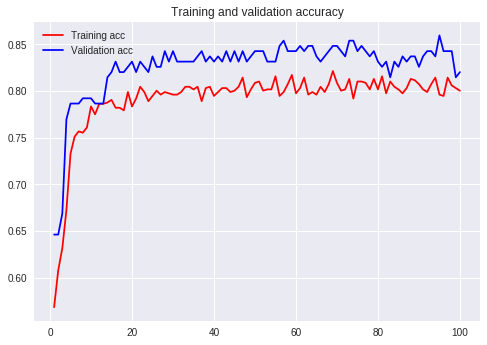

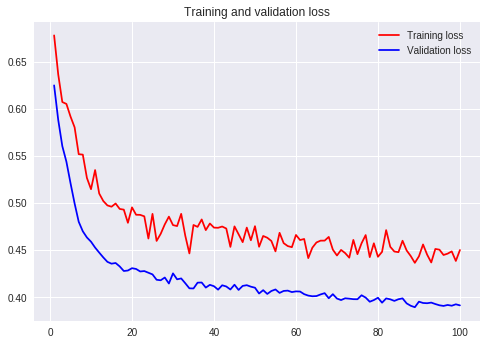

In [209]:
# Plotting training and validation accuracy and loss against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Will use this model with 3 hidden layers containing 64 hidden units each on test set.

## Further Improvement
The performance can be further improved by:
1. Spending more time on tuning the hyperparameters of the ANN.
2. Using powerful boosting algorithms like XGBoost and LGBM.

## Importing the test set

In [144]:
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Internships/Titanic/data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Analyzing and modifying the test set

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [146]:
df_test.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [147]:
df_test.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [148]:
df_test.Age.isnull().sum()

86

In [0]:
# Filling the NA values in Age with mean value in a new column.
df_test['Age_NA_Is_Mean'] = df_test.Age.fillna(df_test.Age.mean())

In [150]:
df_test.SibSp.value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [151]:
df_test.Parch.value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [152]:
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA_Is_Mean
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,60.5


In [0]:
df_test.Fare.fillna(df_test[(df_test.Embarked == 'S') & (df_test.Pclass == 3) & (df_test.SibSp == 0) 
        & (df_test.Parch == 0)].Fare.mean(), inplace=True)

In [154]:
df_test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [155]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId       418 non-null int64
Pclass            418 non-null int64
Name              418 non-null object
Sex               418 non-null object
Age               332 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Ticket            418 non-null object
Fare              418 non-null float64
Cabin             91 non-null object
Embarked          418 non-null object
Age_NA_Is_Mean    418 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [156]:
passenger_id = df_test.PassengerId
passenger_id[:5]

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

## Preprocessing the test set for model

In [157]:
X_test = df_test.iloc[:, [1,3,5,6,8,10,11]].values
X_test[0]

array([3, 'male', 0, 0, 7.8292, 'Q', 34.5], dtype=object)

In [0]:
# Label encoding on test set
X_test[:, 1] = labelencoder_sex.transform(X_test[:, 1])
X_test[:, 5] = labelencoder_embarked.transform(X_test[:, 5])

In [0]:
# One-Hot encoding on test set
X_test = ohe.transform(X_test).toarray()

In [0]:
X_test = X_test[:, [1,3,4,5,6,7,8,9]]

In [0]:
# Normalization on test set
X_test = norm.transform(X_test)

## Making predictions on test set

In [0]:
# Making predictions on the test set using classifier_gs_svm
y_pred = model.predict(X_test)

In [224]:
# Predictions
y_pred[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [221]:
y_pred = (y_pred > 0.5)
y_pred[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [234]:
# Preparing the submission format for the predictions.
pred_df = pd.concat({'PassengerId': pd.Series(passenger_id), 'Survived': pd.Series(y_pred[:,0])}, 
                    axis=1)
pred_df.head()

,PassengerId,Survived
0,892,False
1,893,False
2,894,False
3,895,False
4,896,False


In [0]:
survival_map = {False: 0, True: 1}

In [0]:
pred_df.Survived = pred_df.Survived.map(survival_map)

In [239]:
pred_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
# Exporting the predictions to a csv file.
pred_df.to_csv('/content/drive/My Drive/Colab Notebooks/Internships/Titanic/data/Survival_Prediction_ANN.csv', index=False)